## IMPORT THE NECCESSARY LIBRARIES


In [516]:
#Importing the neccessary libraries for the dataset
#These include Pandas,numpy, seaborn,matplotlib,norm,stats etc

In [517]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier



## READ DATASET

In [518]:
#Reading the data into the Data Frame.

In [519]:
data_frame = pd.read_csv('C:/Users/HP/Desktop/AirBnBPricing/airbnb-price_predict-main/datasets/AB_NYC_2019.csv')

## 1.DATA DISCOVERY


In [520]:
# This refers to familiarising yourself with data such that you can conceptualise it

In [521]:
# 1.1 Data Preparation

In [522]:

#The data preparation phase rearranges the data so that the visualization and analysis portion of 
#data discovery can run more smoothly.


In [523]:
#Checking to see how the dataset looks like
#Display the first five rows of the dataset
#This confirms the type of data frame in use

In [524]:
data_frame.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [525]:
#Display twenty rows of the dataset randomly

In [526]:
data_frame.sample(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19288,15363266,Beautiful 1 bedroom apartment,3485640,Sophie,Manhattan,Washington Heights,40.83892,-73.94265,Entire home/apt,120,3,4,2019-05-28,0.13,1,7
3161,1885714,Nice Bedroom in Central Bushwick!,2673168,David,Brooklyn,Bushwick,40.70343,-73.91343,Private room,53,1,38,2019-05-25,0.55,1,312
2590,1347847,3 bedroom duplex Brooklyn townhouse,2061760,Lise,Brooklyn,Bedford-Stuyvesant,40.69376,-73.93776,Entire home/apt,225,3,230,2019-07-01,3.31,1,259
29235,22436287,Clinton Hill – Brooklyn’s Best Nest,655450,Tara,Brooklyn,Clinton Hill,40.68299,-73.96258,Entire home/apt,108,29,5,2018-12-21,0.31,1,98
13235,9978606,"Bright, brick BR in East Village",5904463,Katherine,Manhattan,East Village,40.72370,-73.98223,Private room,80,1,2,2016-01-05,0.05,4,0
22142,17825100,2 bedroom with patio in clinton hill,48243500,Carri,Brooklyn,Clinton Hill,40.69422,-73.96565,Entire home/apt,107,2,5,2017-05-30,0.18,1,0
25881,20686099,A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE,76104209,Rated,Manhattan,Upper East Side,40.78019,-73.95857,Entire home/apt,225,30,0,NaN,NaN,33,365
24584,19767346,Cozy Gem in Huge Prewar Midtown Apartment,37092956,Edward,Manhattan,Midtown,40.76358,-73.98015,Private room,72,6,0,NaN,NaN,1,0
28357,22031539,Manhattan Club,983223,Dorothy,Manhattan,Midtown,40.76581,-73.98235,Private room,200,2,1,2017-12-28,0.05,1,0
46948,35507713,Beautiful Ground Floor Upper East Side Apartment,80164857,Nicole,Manhattan,Upper East Side,40.76453,-73.95867,Entire home/apt,160,4,1,2019-06-17,1.00,1,243


In [527]:
#Display the last five rows of the dataset

In [528]:
data_frame.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [529]:
# Checking for infor,atoin about the dataset

In [530]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 2. SANITY DATA CHECK

In [531]:
#Checking for number of missig or null values 

In [532]:
data_frame.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [533]:
data_frame.isnull().sum()/len(data_frame)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [534]:
print("There are {} missing Values in the Data".format(data_frame.isnull().sum().sum()))

There are 20141 missing Values in the Data


In [535]:
# Dislpaying the columns in the dataframe

In [536]:
data_frame.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [537]:
# Describing the Dataframe

In [538]:
data_frame.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [539]:
data_frame[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [540]:
# Dropping the Unnecessary variables

In [541]:
df1 = data_frame[['id',
    #'name', 
    'host_id', 
    #'host_name',
    'neighbourhood_group',
       'neighbourhood', 
        #'latitude', 'longitude', 
    'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 
                  'calculated_host_listings_count',
       'availability_365']].copy()

In [542]:
df1.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [543]:
# Determining the shape of the dataset

In [544]:
df1.shape

(48895, 12)

In [545]:
df1.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [546]:
df1.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [547]:
# Renaming the columns

In [548]:
df1 = df1.rename(columns = {'id':'List_Id', 'host_id':'Host_Id', 'neighbourhood':'Neighbourhood', 
        'neighbourhood_group': 'Neighbourhood_Group',
        'room_type':'Room_Type', 'price':'Price_Dollars',
       'minimum_nights':'Minimum_Nights', 'number_of_reviews':'Number_Of_Reviews', 'last_review':'Last_Reviews',
       'reviews_per_month':'Reviews_Per_Month', 'calculated_host_listings_count':'Number_Of_Host_Listings',
       'availability_365':'Availability'})

In [549]:
df1.head()

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [550]:
df1.sample(20)

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
10430,7986666,6491050,Brooklyn,Williamsburg,Entire home/apt,150,13,8,2017-07-26,0.17,1,0
45793,34952279,256877591,Manhattan,Harlem,Private room,59,25,0,NaN,NaN,1,1
3459,2074653,1468247,Manhattan,East Village,Private room,100,5,2,2016-10-22,0.06,1,0
33382,26383405,19393471,Brooklyn,Sunset Park,Entire home/apt,265,3,23,2019-07-01,1.95,1,365
30035,23124338,171830071,Bronx,Fordham,Private room,65,2,5,2018-03-26,0.30,1,0
24050,19386162,106948134,Manhattan,Roosevelt Island,Private room,72,1,12,2019-05-22,0.48,2,0
7772,5893277,30606207,Queens,Ditmars Steinway,Private room,175,30,5,2019-03-25,0.31,1,283
30249,23359277,14719992,Brooklyn,Cypress Hills,Private room,35,1,17,2019-02-17,1.13,3,0
48046,36059155,271264403,Manhattan,Murray Hill,Entire home/apt,229,1,0,NaN,NaN,1,176
25923,20707833,148241246,Manhattan,Harlem,Private room,65,3,69,2019-07-01,3.16,1,57


In [551]:
df1.tail()

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,68119814,Manhattan,Hell's Kitchen,Private room,90,7,0,NaN,NaN,1,23


## Filling the Null value

In [552]:
#Checking for number of missig or null values 

In [553]:
df1.isnull()

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,True,True,False,False


In [554]:
df1.loc[df1.duplicated(subset = ['Neighbourhood'])]

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
10,5295,7702,Manhattan,Upper West Side,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
11,5441,7989,Manhattan,Hell's Kitchen,Private room,85,2,188,2019-06-23,1.50,1,39
13,6021,11528,Manhattan,Upper West Side,Private room,85,2,113,2019-07-05,0.91,1,333
19,7750,17985,Manhattan,East Harlem,Entire home/apt,190,7,0,NaN,NaN,2,249
20,7801,21207,Brooklyn,Williamsburg,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


In [555]:
df1.isnull().sum()/len(df1)*100

List_Id                     0.000000
Host_Id                     0.000000
Neighbourhood_Group         0.000000
Neighbourhood               0.000000
Room_Type                   0.000000
Price_Dollars               0.000000
Minimum_Nights              0.000000
Number_Of_Reviews           0.000000
Last_Reviews               20.558339
Reviews_Per_Month          20.558339
Number_Of_Host_Listings     0.000000
Availability                0.000000
dtype: float64

In [556]:
print("There are {} missing Values in the Data".format(data_frame.isnull().sum().sum()))

There are 20141 missing Values in the Data


In [557]:

# Fill missing values or drop columns with too many missing values



In [558]:
df1['Reviews_Per_Month'].fillna(0, inplace=True)
df1.drop(['Last_Reviews'], axis=1, inplace=True)



In [559]:
# Check for missing values

In [560]:
df1.isnull().sum()

List_Id                    0
Host_Id                    0
Neighbourhood_Group        0
Neighbourhood              0
Room_Type                  0
Price_Dollars              0
Minimum_Nights             0
Number_Of_Reviews          0
Reviews_Per_Month          0
Number_Of_Host_Listings    0
Availability               0
dtype: int64

In [561]:
print("There are {} missing Values in the Data".format(df1.isnull().sum().sum()))

There are 0 missing Values in the Data


In [562]:
# Checking for duplicate values

In [563]:
df1.loc[df1.duplicated()]

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability


In [564]:
df1.duplicated(subset = ['Neighbourhood'])

0        False
1        False
2        False
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Length: 48895, dtype: bool

In [566]:
df1.query('Neighbourhood =="East Harlem"')

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
19,7750,17985,Manhattan,East Harlem,Entire home/apt,190,7,0,0.00,2,249
70,16974,65837,Manhattan,East Harlem,Entire home/apt,225,4,190,1.64,1,215
154,36647,157798,Manhattan,East Harlem,Private room,69,2,34,0.32,1,10
208,54860,258164,Manhattan,East Harlem,Private room,100,5,204,1.92,1,192
...,...,...,...,...,...,...,...,...,...,...,...
48818,36447795,274035866,Manhattan,East Harlem,Entire home/apt,110,2,0,0.00,1,25
48874,36477588,214535893,Manhattan,East Harlem,Private room,50,7,0,0.00,1,22
48875,36478343,274273284,Manhattan,East Harlem,Private room,140,1,0,0.00,1,180
48883,36482416,131529729,Manhattan,East Harlem,Private room,75,2,0,0.00,2,364


In [567]:
df1.dtypes

List_Id                      int64
Host_Id                      int64
Neighbourhood_Group         object
Neighbourhood               object
Room_Type                   object
Price_Dollars                int64
Minimum_Nights               int64
Number_Of_Reviews            int64
Reviews_Per_Month          float64
Number_Of_Host_Listings      int64
Availability                 int64
dtype: object

In [568]:
df1 = df1.loc[~df1.duplicated(subset = ['Neighbourhood','Room_Type','Minimum_Nights','Number_Of_Reviews'])]\
.reset_index(drop=True).copy()


In [569]:
# Checking for garbage

In [570]:
for i in df1.select_dtypes(include = "object").columns:
    print(df1[i].value_counts())
    print('***'*10)

Manhattan        9453
Brooklyn         9293
Queens           3803
Bronx             972
Staten Island     356
Name: Neighbourhood_Group, dtype: int64
******************************
Bedford-Stuyvesant    1212
Williamsburg          1119
Harlem                1006
Bushwick               780
Hell's Kitchen         755
                      ... 
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Woodrow                  1
Willowbrook              1
Name: Neighbourhood, Length: 221, dtype: int64
******************************
Entire home/apt    12331
Private room       10686
Shared room          860
Name: Room_Type, dtype: int64
******************************


In [571]:
#Checking for unique values

In [572]:
df1.nunique()

List_Id                    23877
Host_Id                    19525
Neighbourhood_Group            5
Neighbourhood                221
Room_Type                      3
Price_Dollars                515
Minimum_Nights               109
Number_Of_Reviews            394
Reviews_Per_Month            899
Number_Of_Host_Listings       43
Availability                 366
dtype: int64

In [573]:
df1.shape

(23877, 11)

In [574]:
# Describing the dataset

In [575]:
df1.describe()

,List_Id,Host_Id,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
count,2.387700e+04,2.387700e+04,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000
mean,1.476919e+07,5.385410e+07,142.285756,7.950706,40.057419,1.440328,2.816099,125.751979
std,1.048182e+07,6.805600e+07,232.306408,27.374581,56.620952,1.775315,12.395368,130.967852
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,4.951402e+06,5.202854e+06,67.000000,2.000000,4.000000,0.170000,1.000000,0.000000
50%,1.400781e+07,2.246338e+07,100.000000,3.000000,17.000000,0.760000,1.000000,77.000000
75%,2.275209e+07,7.653684e+07,160.000000,5.000000,53.000000,2.210000,2.000000,249.000000
max,3.647575e+07,2.742256e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [576]:
# Histogram to understand the distribution

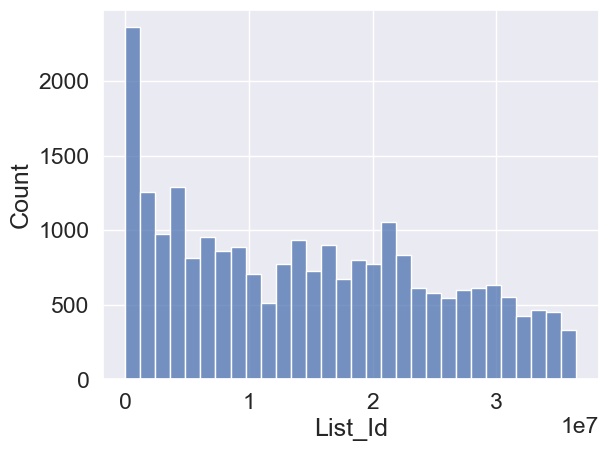

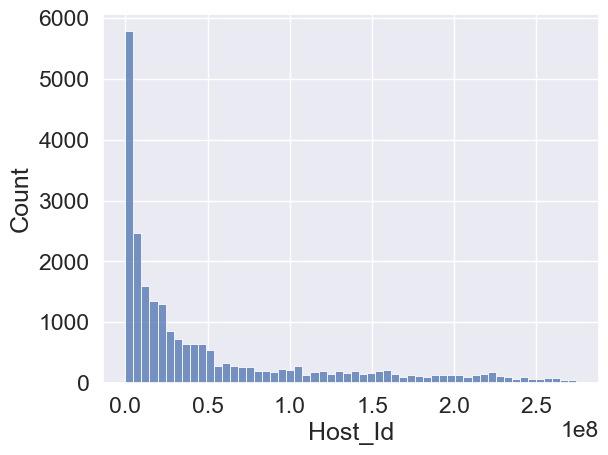

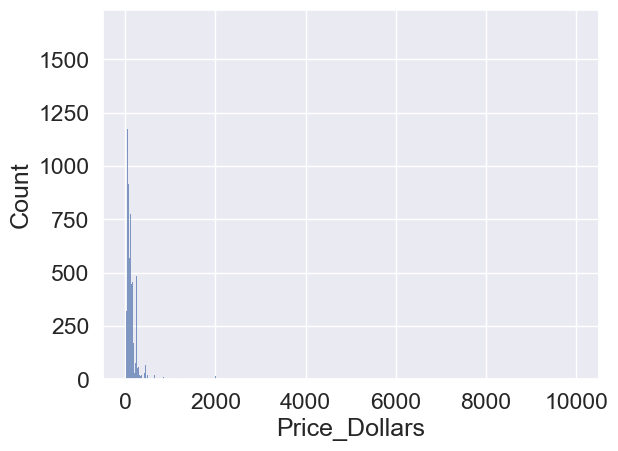

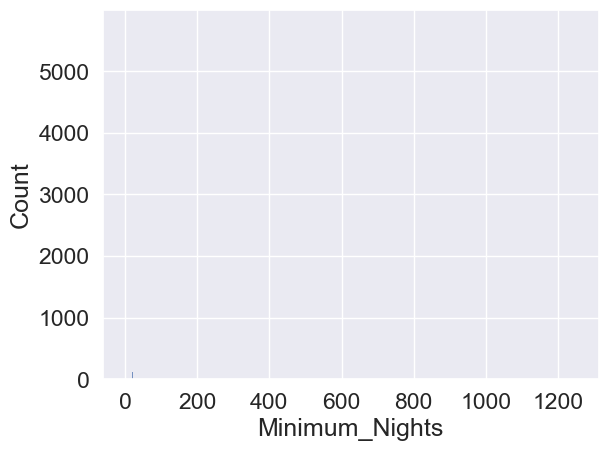

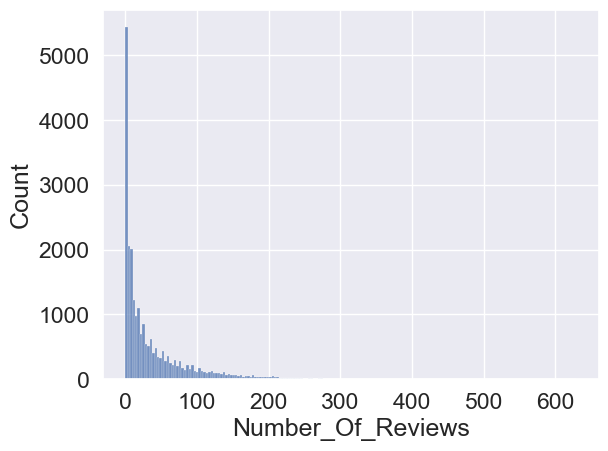

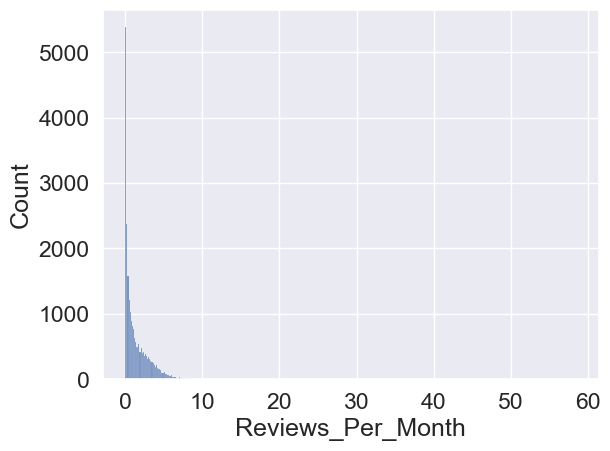

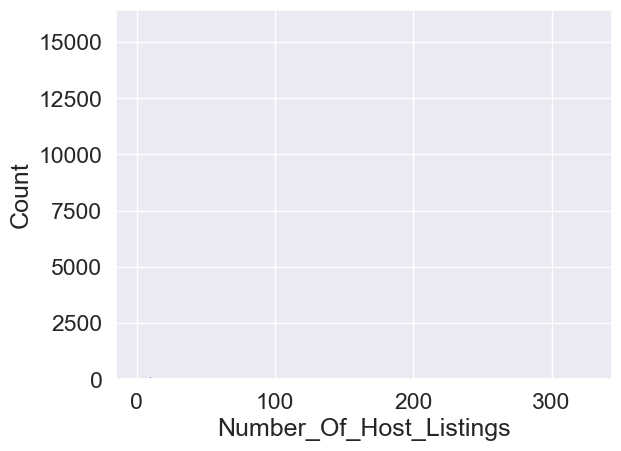

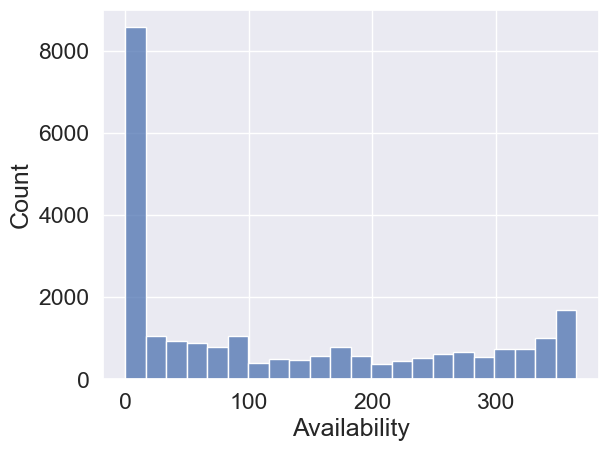

In [577]:
for i in df1.select_dtypes(include="number").columns:
     sns.histplot(data=df1,x=i)
     plt.show()

In [578]:
# BoxPlot to identify outliers

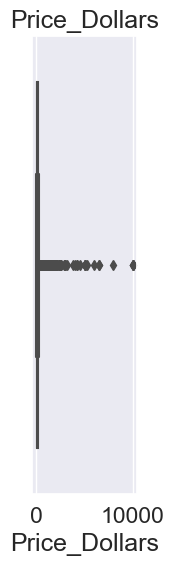

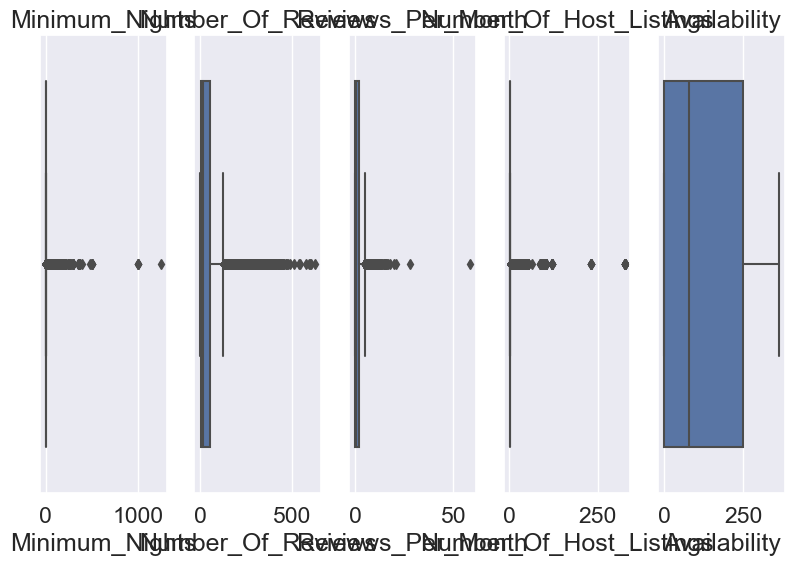

In [579]:
plt.figure(figsize=(8,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Price_Dollars')
plt.title('Price_Dollars')
plt.tight_layout()

plt.figure(figsize=(8,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Minimum_Nights')
plt.title('Minimum_Nights')
plt.tight_layout()


plt.subplot(1,5,2)
sns.boxplot(data=df1,x='Number_Of_Reviews')
plt.title('Number_Of_Reviews')
plt.tight_layout()


plt.subplot(1,5,3)
sns.boxplot(data=df1,x='Reviews_Per_Month')
plt.title('Reviews_Per_Month')
plt.tight_layout()


plt.subplot(1,5,4)
sns.boxplot(data=df1,x='Number_Of_Host_Listings')
plt.title('Number_Of_Host_Listings')
plt.tight_layout()


plt.subplot(1,5,5)
sns.boxplot(data=df1,x='Availability')
plt.title('Availability')
plt.tight_layout()


In [580]:
# Outlier treatment

In [581]:
#Detection and removal of outliers using percentile

In [582]:
# Calculating the lower and upper percentile threshold for Price_Dollars

min_threshold,max_threshold=df1.Price_Dollars.quantile([0.001,0.999])
min_threshold,max_threshold
print("Entries with Prices below", min_threshold, "or above" ,max_threshold, "are removed")

min_threshold,max_threshold=df1.Minimum_Nights.quantile([0.010,0.999])
min_threshold,max_threshold
print("Entries with Nights below", min_threshold, "or above" ,max_threshold, "are removed")

min_threshold,max_threshold=df1.Number_Of_Reviews.quantile([0.001,0.999])
min_threshold,max_threshold
print("Entries with Number of reviews below", min_threshold, "or above" ,max_threshold, "are removed")

min_threshold,max_threshold=df1.Reviews_Per_Month.quantile([0.001,0.999])
min_threshold,max_threshold
print("Entries with Monthly reviews below", min_threshold, "or above" ,max_threshold, "are removed")

min_threshold,max_threshold=df1.Number_Of_Host_Listings.quantile([0.010,0.999])
min_threshold,max_threshold
print("Entries with Listings below", min_threshold, "or above" ,max_threshold, "are removed")

Entries with Prices below 16.0 or above 2631.0000000008586 are removed
Entries with Nights below 1.0 or above 365.0 are removed
Entries with Number of reviews below 0.0 or above 430.0 are removed
Entries with Monthly reviews below 0.0 or above 12.858600000000514 are removed
Entries with Listings below 1.0 or above 232.0 are removed


In [583]:
# Determining the rows where Price_Dollars is below the lower threshold
df1[df1.Price_Dollars<min_threshold]
df1[df1.Minimum_Nights<min_threshold]
df1[df1.Number_Of_Reviews<min_threshold]
df1[df1.Reviews_Per_Month<min_threshold]
df1[df1.Number_Of_Host_Listings<min_threshold]    


,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability


In [584]:
#Determining the rows where Price_Dollars is above the upper threshold

df1[df1.Price_Dollars>max_threshold]
df1[df1.Minimum_Nights>max_threshold]
df1[df1.Number_Of_Reviews>max_threshold]
df1[df1.Reviews_Per_Month>max_threshold]
df1[df1.Number_Of_Host_Listings>max_threshold]


,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
21914,30937594,219517861,Manhattan,Murray Hill,Entire home/apt,245,2,4,0.94,327,137
21915,30937595,219517861,Manhattan,Hell's Kitchen,Entire home/apt,185,29,1,1.00,327,281
21916,30937597,219517861,Manhattan,Murray Hill,Entire home/apt,252,2,7,1.19,327,117
21917,30937762,219517861,Manhattan,Murray Hill,Entire home/apt,243,2,6,1.09,327,153
22390,32218803,219517861,Manhattan,Financial District,Private room,200,2,13,2.81,327,352
22393,32223317,219517861,Manhattan,Financial District,Entire home/apt,404,2,10,2.26,327,330
22395,32225187,219517861,Manhattan,Financial District,Private room,375,2,5,1.24,327,280
22396,32225206,219517861,Manhattan,Financial District,Entire home/apt,472,2,12,2.67,327,234
22397,32225207,219517861,Manhattan,Financial District,Private room,256,2,16,3.75,327,329
22400,32236518,219517861,Manhattan,Financial District,Entire home/apt,454,2,11,3.33,327,297


In [585]:
# Filtering the dataset to remove outliers
df1= df1[(df1.Price_Dollars<max_threshold) & (df1.Price_Dollars>min_threshold)]
df1= df1[(df1.Minimum_Nights<max_threshold) & (df1.Minimum_Nights>min_threshold)]
df1= df1[(df1.Number_Of_Reviews<max_threshold) & (df1.Number_Of_Reviews>min_threshold)]
df1= df1[(df1.Reviews_Per_Month<max_threshold) & (df1.Reviews_Per_Month>min_threshold)]
df1= df1[(df1.Number_Of_Host_Listings<max_threshold) & (df1.Number_Of_Host_Listings>min_threshold)]
df1.shape

(2255, 11)

In [586]:
df1.sample(20)

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
11065,13033170,2637408,Brooklyn,Williamsburg,Entire home/apt,175,3,122,3.37,2,128
6515,5791707,248865,Manhattan,Upper East Side,Entire home/apt,100,30,71,1.42,3,248
13095,15855646,5192686,Brooklyn,Prospect-Lefferts Gardens,Private room,100,2,90,2.95,2,0
16510,21054012,48638439,Queens,Springfield Gardens,Entire home/apt,200,3,23,1.18,2,357
2892,1763956,9271872,Manhattan,Hell's Kitchen,Private room,80,5,62,1.72,2,23
714,264323,305972,Manhattan,Morningside Heights,Private room,85,7,171,1.84,2,144
8686,8760442,45937956,Queens,Jackson Heights,Entire home/apt,85,3,91,2.11,2,50
14564,18117334,3388950,Brooklyn,Bedford-Stuyvesant,Private room,72,4,59,2.22,6,120
18812,24599452,185889529,Queens,St. Albans,Private room,50,3,58,4.69,3,358
19937,26926704,23542079,Brooklyn,East Flatbush,Private room,45,3,35,3.01,2,30


In [587]:
print(df1.shape)

(2255, 11)


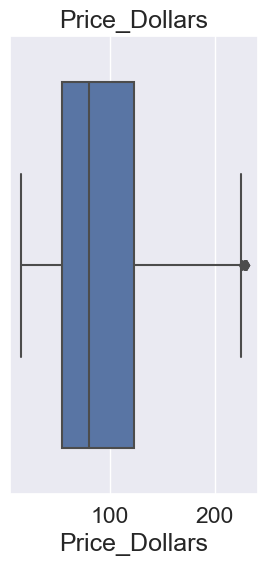

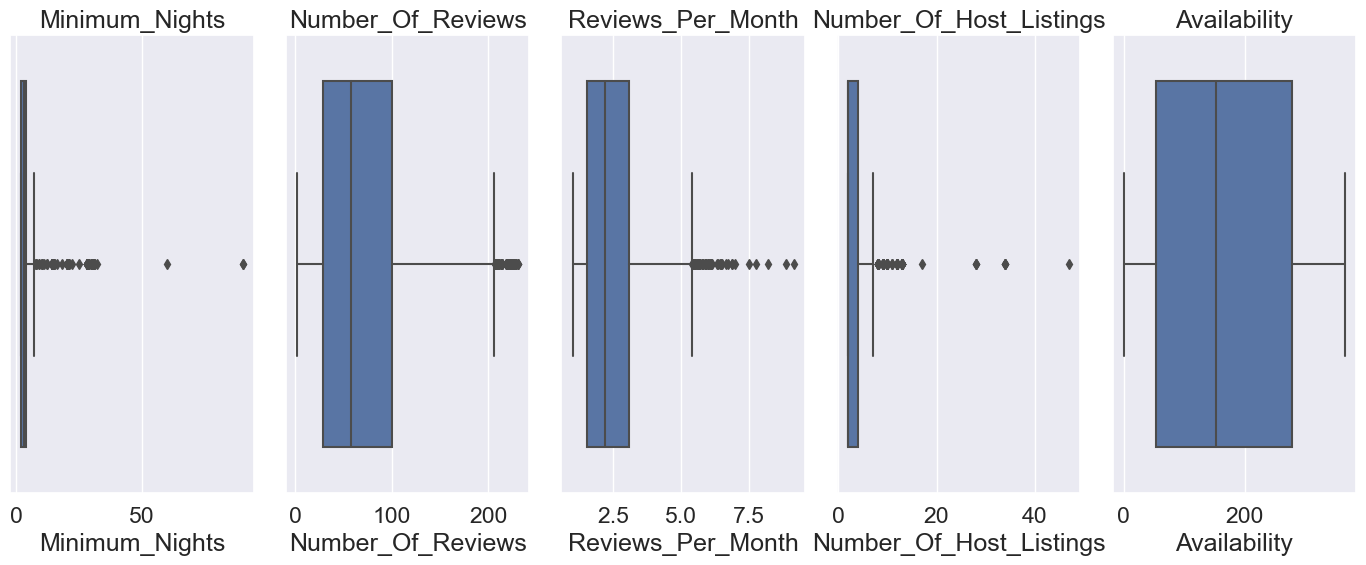

In [588]:



plt.figure(figsize=(14,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Price_Dollars')
plt.title('Price_Dollars')
plt.tight_layout()

plt.figure(figsize=(14,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Minimum_Nights')
plt.title('Minimum_Nights')
plt.tight_layout()


plt.subplot(1,5,2)
sns.boxplot(data=df1,x='Number_Of_Reviews')
plt.title('Number_Of_Reviews')
plt.tight_layout()


plt.subplot(1,5,3)
sns.boxplot(data=df1,x='Reviews_Per_Month')
plt.title('Reviews_Per_Month')
plt.tight_layout()


plt.subplot(1,5,4)
sns.boxplot(data=df1,x='Number_Of_Host_Listings')
plt.title('Number_Of_Host_Listings')
plt.tight_layout()


plt.subplot(1,5,5)
sns.boxplot(data=df1,x='Availability')
plt.title('Availability')
plt.tight_layout()


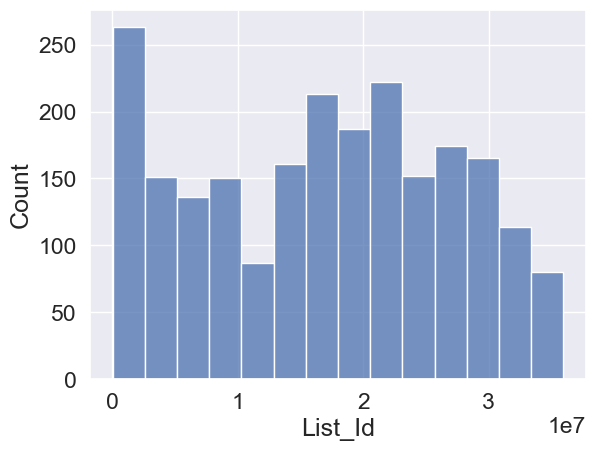

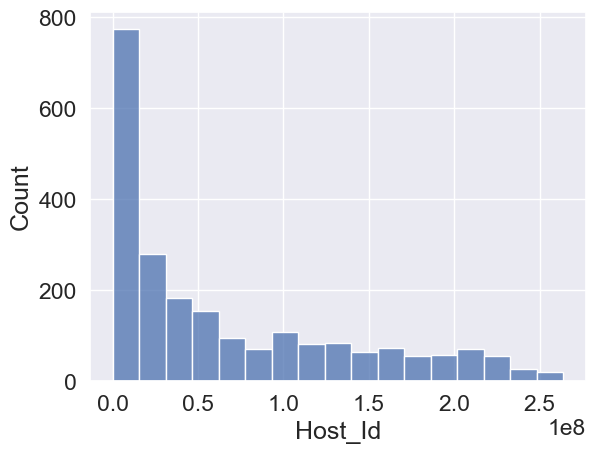

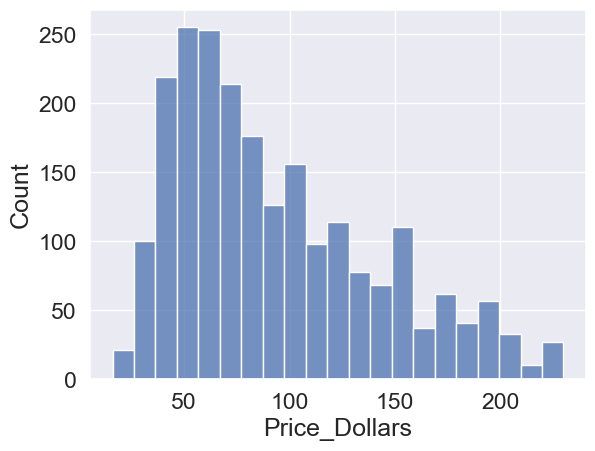

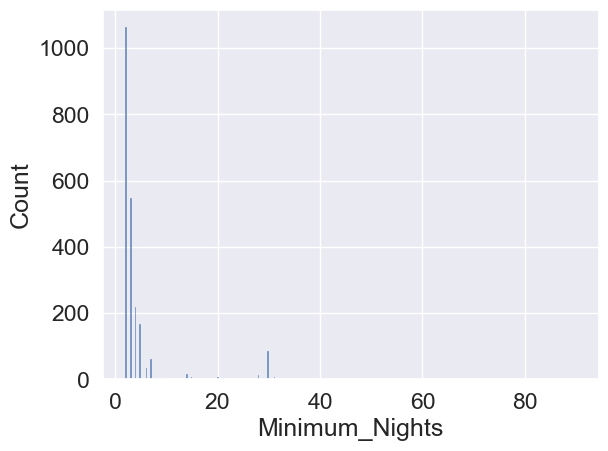

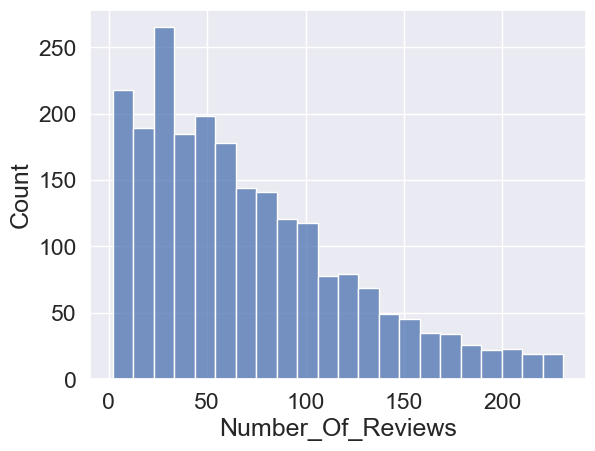

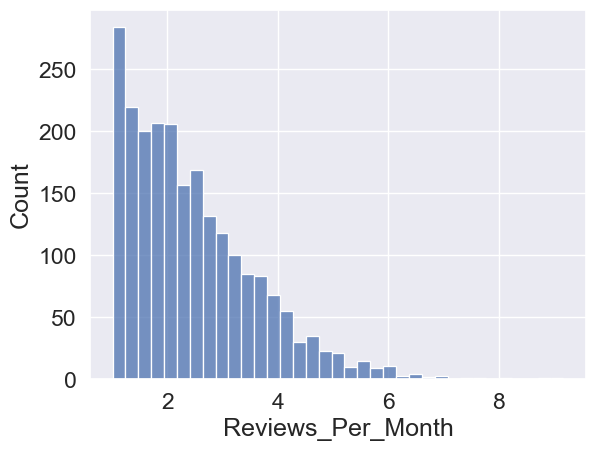

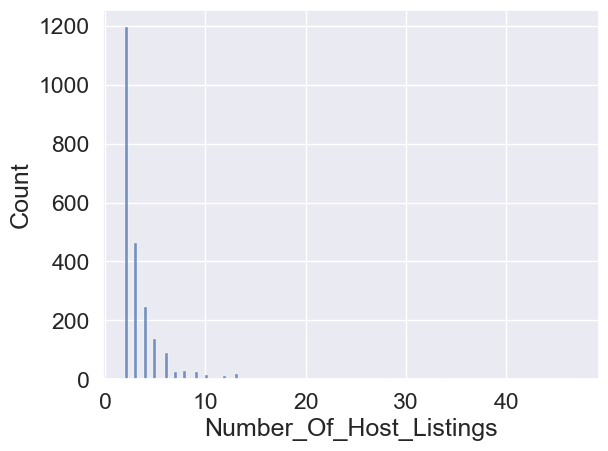

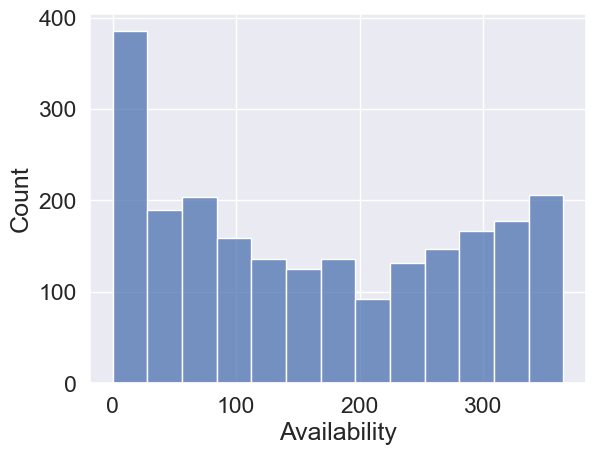

In [589]:
for i in df1.select_dtypes(include="number").columns:
     sns.histplot(data=df1,x=i)
     plt.show()

In [590]:
# Defining the columns of the dataframe

In [591]:
df1.columns


Index(['List_Id', 'Host_Id', 'Neighbourhood_Group', 'Neighbourhood',
       'Room_Type', 'Price_Dollars', 'Minimum_Nights', 'Number_Of_Reviews',
       'Reviews_Per_Month', 'Number_Of_Host_Listings', 'Availability'],
      dtype='object')

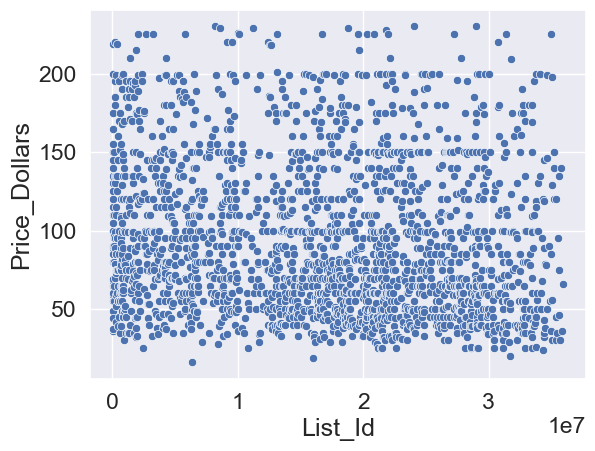

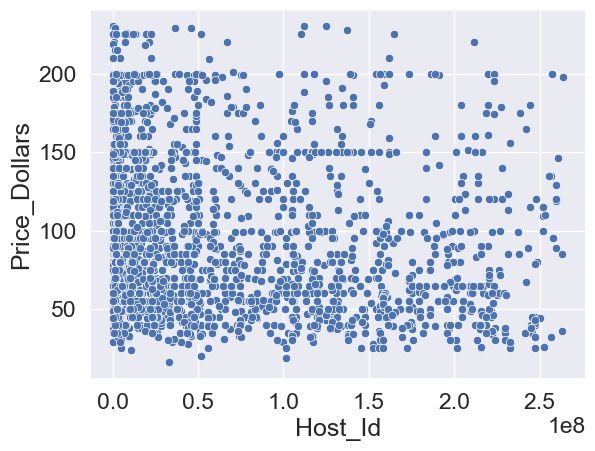

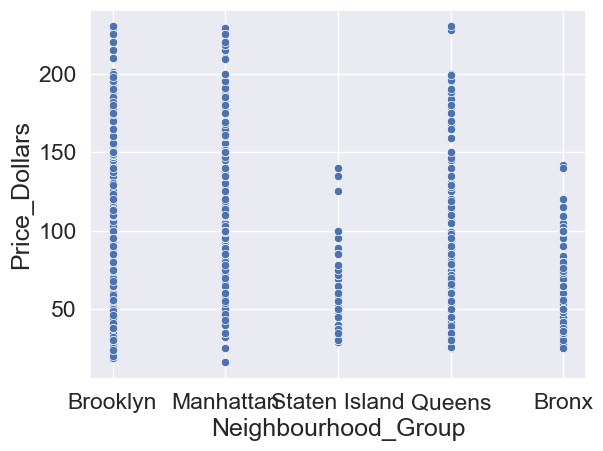

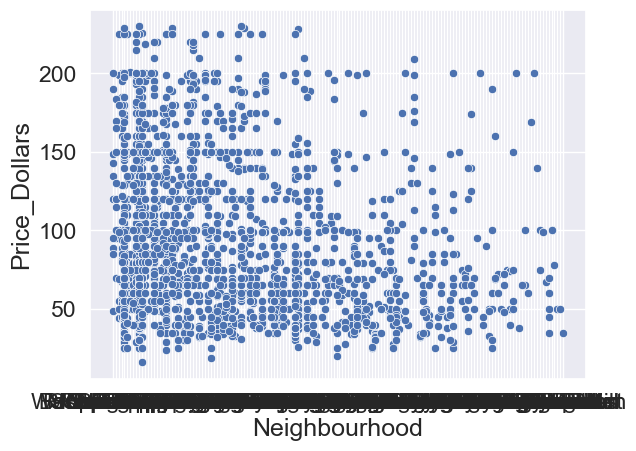

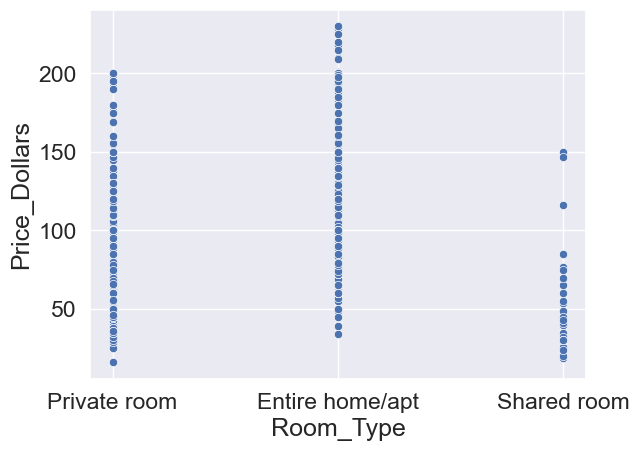

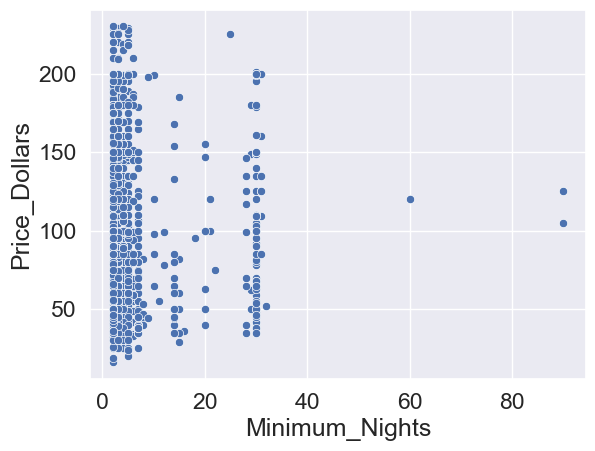

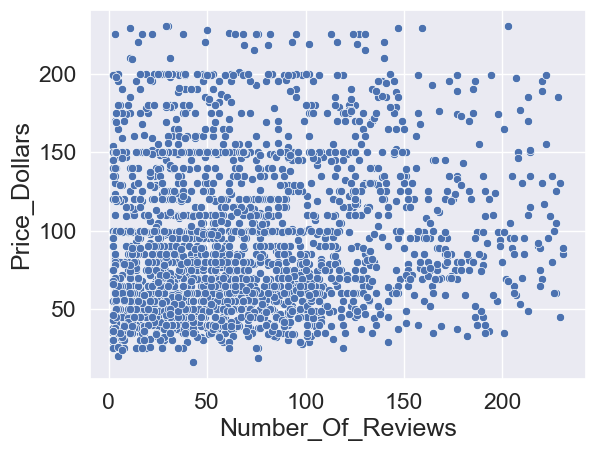

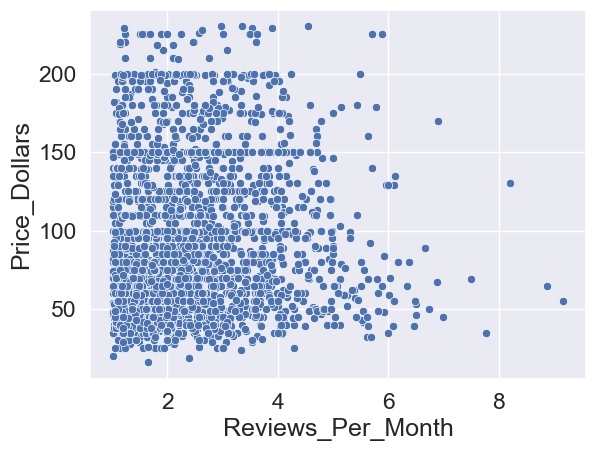

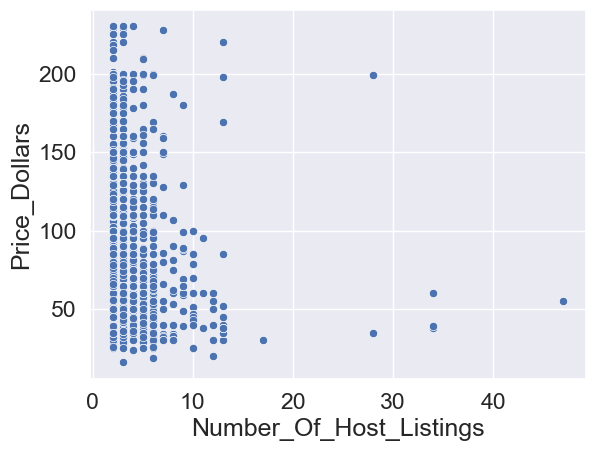

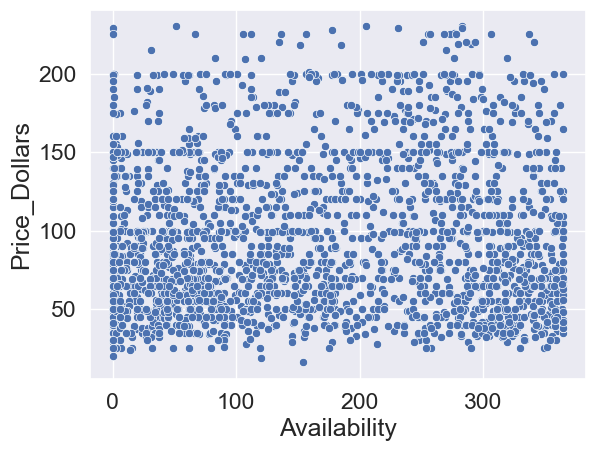

In [592]:
for i in ['List_Id', 'Host_Id','Neighbourhood_Group', 'Neighbourhood', 'Room_Type', 
       'Minimum_Nights', 'Number_Of_Reviews', 'Reviews_Per_Month',
       'Number_Of_Host_Listings', 'Availability']:
     sns.scatterplot(data=df1,x=i,y='Price_Dollars')
     plt.show()

In [593]:
# Pie Chart showing room type distribution percentage

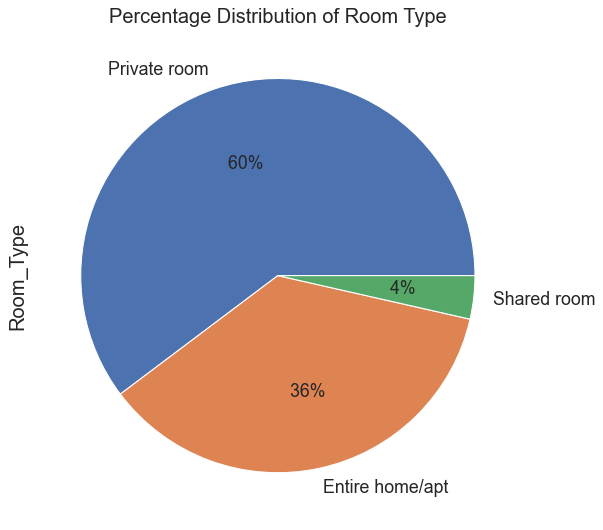

In [594]:
fig = plt.figure(figsize=(8,8), dpi=80)
df1['Room_Type'].value_counts().plot(kind='pie',  autopct='%4.0f%%', startangle=360, fontsize=16)
plt.title('Percentage Distribution of Room Type')
plt.show()

In [595]:
# Pie chart showing the percentage distribution of Neighbourhood_Group

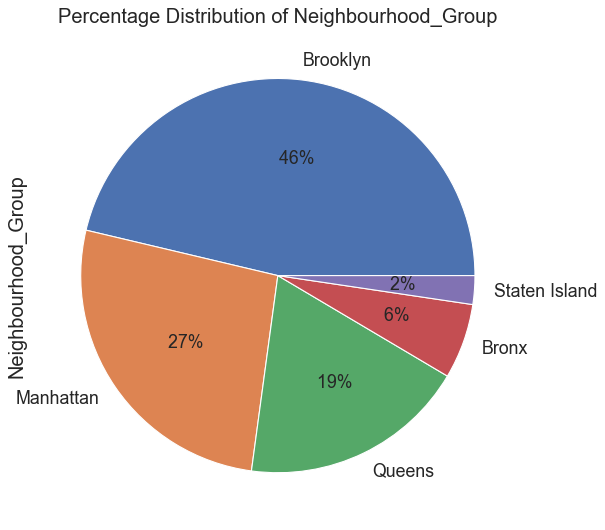

In [596]:
fig = plt.figure(figsize=(8,8), dpi=80)
df1['Neighbourhood_Group'].value_counts().plot(kind='pie',  autopct='%4.0f%%', startangle=360, fontsize=16)
plt.title('Percentage Distribution of Neighbourhood_Group')
plt.show()

<AxesSubplot:xlabel='Neighbourhood_Group', ylabel='Price_Dollars'>

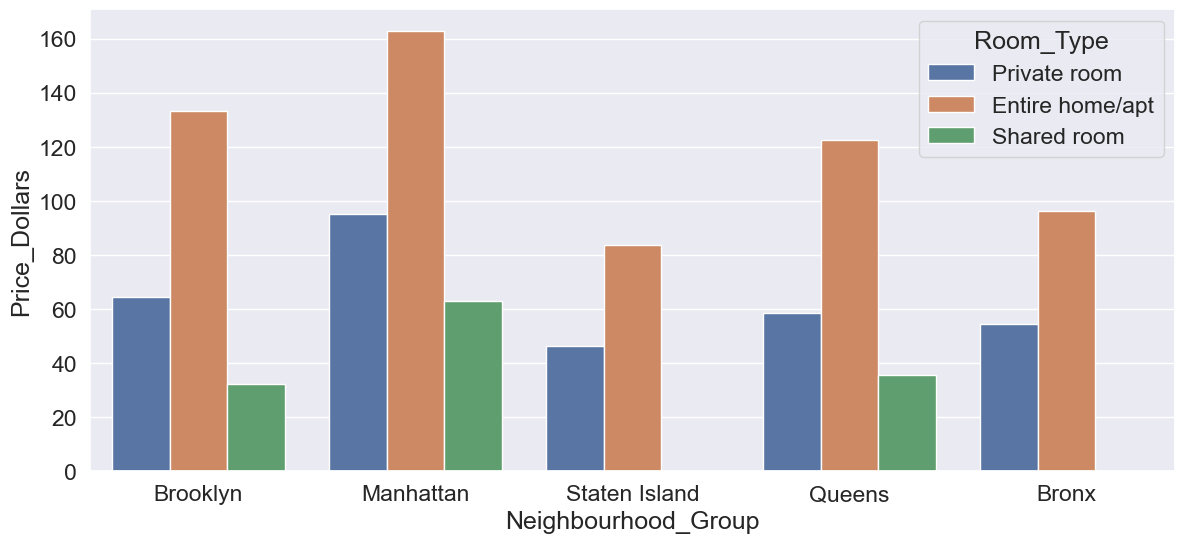

In [597]:
plt.figure(figsize=(14, 6))
sns.barplot(df1.Neighbourhood_Group, df1.Price_Dollars, hue=df1.Room_Type, ci=None)

In [598]:
# Histogram to understand the distribution of prices

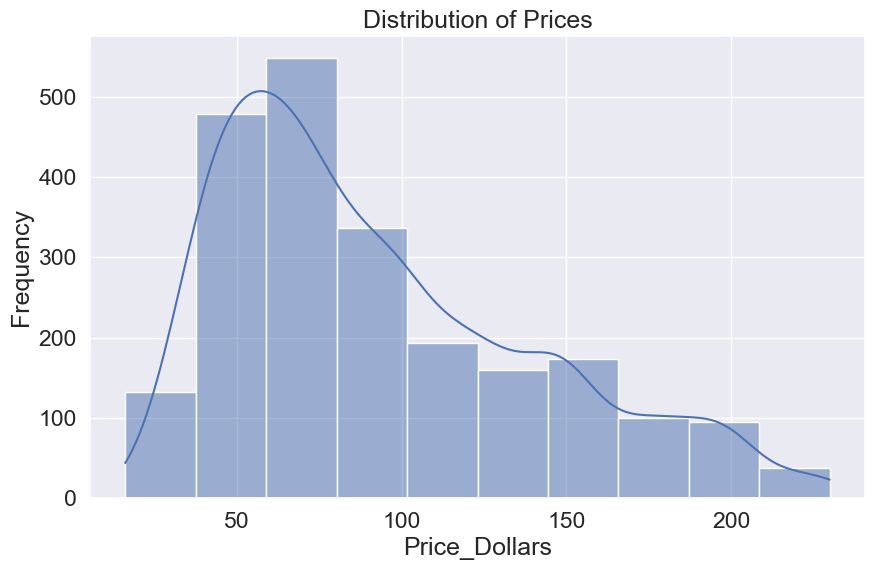

In [599]:

# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df1['Price_Dollars'], bins=10, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price_Dollars')
plt.ylabel('Frequency')
plt.show()


In [600]:
print(f"Average of price per night : ${df1.Price_Dollars.mean():.2f}")
print(f"Maximum price per night : ${df1.Price_Dollars.max()}")
print(f"Minimum price per night : ${df1.Price_Dollars.min()}")

Average of price per night : $93.30
Maximum price per night : $230
Minimum price per night : $16


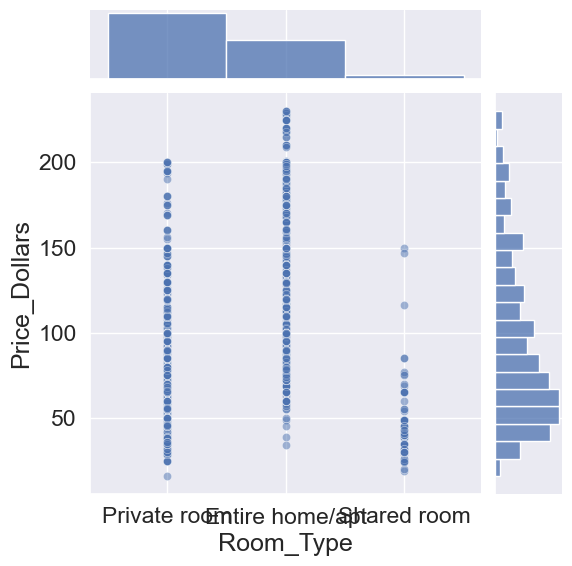

In [601]:
sns.jointplot(x ='Room_Type', y = 'Price_Dollars',data=df1,alpha=0.5)

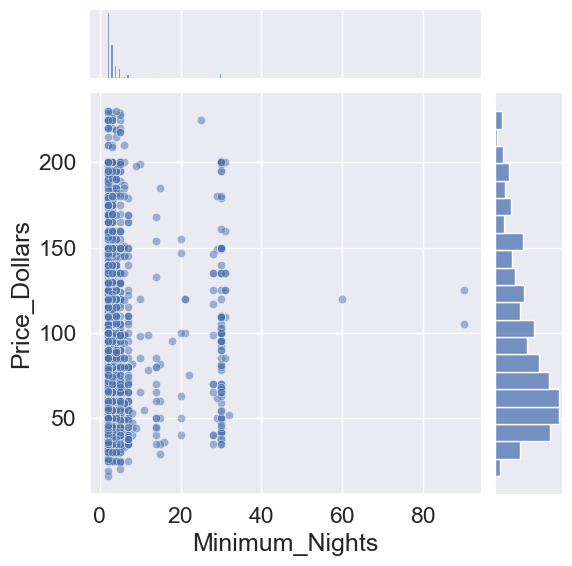

In [602]:
sns.jointplot(x ='Minimum_Nights', y = 'Price_Dollars',data=df1,alpha=0.5)


In [ ]:
sns.jointplot(x ='Neighbourhood_Group', y = 'Price_Dollars',data=df1,alpha=0.5)

In [ ]:
# Ploting a correlation matrix to interpret the relation and multicolinearity

In [ ]:
correlation_matrix = df1.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm',annot_kws={'fontsize':18, 'fontweight':'bold'})
sns.set(font_scale=1.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df1.select_dtypes(include="number").corr()

In [ ]:
# Assigning integers to Neighbourhood_Group and Room_Type

In [ ]:
oe = OrdinalEncoder()
df1['Neighbourhood_Group'] = oe.fit_transform(df1[['Neighbourhood_Group']])
df1['Room_Type'] = oe.fit_transform(df1[['Room_Type']])

In [ ]:
print(df1)

In [ ]:
df1.sample(20)

## FEATURE ENGINEERING

In [ ]:
# Select Relevant features that will help with model development

In [ ]:
features = ['Minimum_Nights', 'Neighbourhood_Group','Room_Type','Number_Of_Host_Listings', 'Availability']
target = 'Price_Dollars'

df1 = df1.dropna(subset=features + [target])

# LINEAR REGRESSION MODEL

In [ ]:
# SPLITTING INTO TRAIN AND TEST

In [ ]:
X = df1[features]
y= df1[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalising the dataset

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# MODEL TRAINING

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
# MODEL EVALUATION

In [ ]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean absolute Error: {mae}')
print(f'R-squared: {r2}')

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
# Implement Dynamic Pricing

In [ ]:
df1['Predicted_Price']= lr.predict(df1[features])
df1['Adjusted_Price']=df1['Predicted_Price']*1.1
print("PREDICTED PRICE\n")
print(df1['Predicted_Price'])
print("\n")
print("ADJUSTED PRICE")
print(df1['Adjusted_Price'])

In [ ]:
# MONITOR AND UPDATING THE MODEL

In [ ]:
import time

def monitor_and_update_model(df1, lr, features, target, threshold=0.5, interval=86400):
    while True:
        # Predict prices
        df1['Predicted_Price'] = lr.predict(df1[features])
        df1['Adjusted_Price'] = df1['Predicted_Price'] * 1.1
# Calculate performance metrics
mse = mean_squared_error(df1['Adjusted_Price'], df1['Predicted_Price'])
rmse = mse ** 0.5
mae = mean_absolute_error(df1['Adjusted_Price'], df1['Predicted_Price'])
r2 = r2_score(df1['Adjusted_Price'], df1['Predicted_Price'])

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

time.sleep(3600)


##  LOGISTIC REGRESSION

In [ ]:
# Convert the problem into a classification Problem.

In [ ]:
# Data preparation

In [ ]:
# Create a binary target variable
median_price = df1['Price_Dollars'].median()
df1['Price_category'] = (df1['Price_Dollars'] > median_price).astype(int)

# Update features and target
y = df1['Price_category']


In [ ]:
# MODEL TRAINING

In [1742]:

log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)


LogisticRegression()

In [1743]:
# MODEL EVALUATION

In [1744]:

y_pred_log = log_mod.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.057649667405764965
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         3
          32       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         3
          35       0.00      0.00      0.00        13
          37       0.00      0.00      0.00         3
          38       0.50      0.33      0.40         6
          39       0.00      0.00      0.00         2
          40       0.06      0.20      0.09        10
          41       0.00      0.00      0.00        

In [1745]:
#Analysising Residuals

In [1746]:
residuals = y_test-y_pred

In [1747]:
residuals

21939   -19.713332
15312   -24.306172
22467     4.571562
8647      0.944191
6701    -30.052725
           ...    
20464    24.329908
6268     76.858120
5402    -45.298077
1438    -35.093210
21001    11.506602
Name: Price_Dollars, Length: 451, dtype: float64

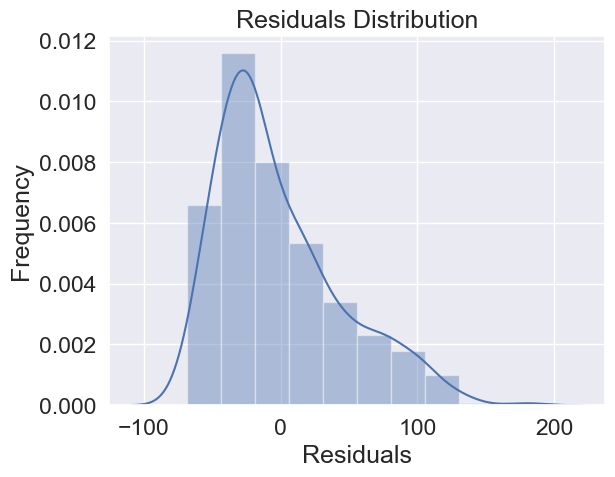

In [1748]:
sns.distplot(residuals,bins=10,kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## LASSO REGRESSION MODEL

In [1749]:
# MODEL TRAINING

In [1750]:
lasso_mod = Lasso(alpha=0.1)
lasso_mod.fit(X_train, y_train)


Lasso(alpha=0.1)

In [1751]:
# MODEL EVALUATION

In [1752]:
y_pred_lasso = lasso_mod.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = math.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'Root Means Squared Error (Lasso): {rmse_lasso}')
print(f'Mean Absolute Error (Lasso): {mae_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')


Mean Squared Error (Lasso): 2066.0720337814637
Root Means Squared Error (Lasso): 45.454065096330645
Mean Absolute Error (Lasso): 36.69904475735929
R-squared (Lasso): 0.04277456152377823


## RANDOM FOREST

In [1753]:
# MODEL TRAINING

In [1754]:
rf_mod = RandomForestRegressor(n_estimators=100,random_state=20)
rf_mod.fit(X_train, y_train)


RandomForestRegressor(random_state=20)

In [1755]:
# MODEL EVALUATION

In [1756]:
y_pred_rf = rf_mod.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf= math.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_lasso)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest R-Squared: {r2_rf}')



Random Forest MSE: 2032.6088385809312
Random Forest RMSE: 45.08446338353082
Random Forest MAE: 36.69904475735929
Random Forest R-Squared: 0.05827829090731673
